In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

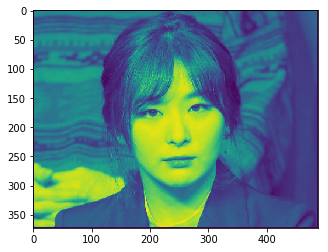

In [8]:
img = Image.open("data.jpg"). convert("L")
M,N = img.size
data = np.pad(img, ([1,1],[1,1]), mode="constant")
plt.imshow (data)

In [9]:
xsobel=np.array ([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]])
ysobel=np.array ([[1,2,1],
                  [0,0,0],
                  [-1,-2,-1]])
xprewid=np.array ([[-1,0,1],
                  [-1,0,1],
                  [-1,0,1]])
yprewid=np.array ([[1,1,1],
                  [0,0,0],
                  [-1,-1,-1]])
xrobet=np.array ([[1,0],
                [0,-1]])
yrobet=np.array ([[0,1],
                [-1,0]])

In [10]:
def konvolusi (ker, data):
    hasil=np.zeros((N,M), dtype="int")
    robert=np.zeros((N,M), dtype="int")
    if (ker.size >= 9):
        for i in range (N):
            for j in range (M):
                hasil[i,j]= data[i,j]*ker[0,0]+data[i,j+1]*ker[0,1]+data[i,j+2]*ker[0,2]
                hasil[i,j]= hasil[i,j]+data[i+1,j]*ker[1,0]+data[i+1,j+1]*ker[1,1]+data[i+1,j+2]*ker[1,2]
                hasil[i,j]= hasil[i,j]+data[i+2,j]*ker[2,0]+data[i+2,j+1]*ker[2,1]+data[i+2,j+2]*ker[2,2]
        return hasil
    elif (ker.size <=4):
        for v in range (N):
            for w in range (M):
                robert[v,w]= data[v,w]*ker[0,0]+data[v,w+1]*ker[0,1]
                robert[v,w]= robert[v,w]+data[v+1,w]*ker[1,0]+data[v+1,w+1]*ker[1,1]
        return robert

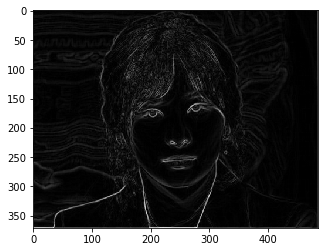

In [11]:
xs=konvolusi (xsobel,data)
ys=konvolusi (ysobel,data)
sobel=abs(xs)+abs(ys)
plt.imshow (sobel,'gray')

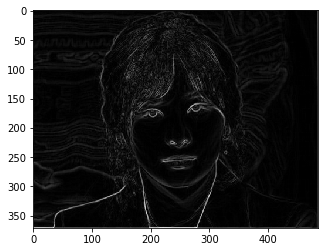

In [12]:
xp=konvolusi (xprewid,data)
yp=konvolusi (yprewid,data)
prewid=abs(xs)+abs(ys)
plt.imshow (prewid,'gray')

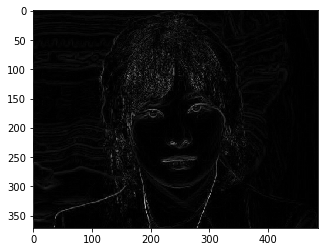

In [13]:
xr=konvolusi (xrobet,data)
yr=konvolusi (yrobet,data)
robert = abs (xr)+abs(yr)
plt.imshow (robert,'gray')